<a href="https://colab.research.google.com/github/KangChou/text-to-image/blob/main/stable_diffusion_v1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diffusers==0.10.2 transformers scipy ftfy accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
from diffusers import StableDiffusionPipeline

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"

model_path = "./models/" + model_id.split("/")[-1]
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, cache_dir=model_path)
#pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)

prompt = "a photograph of an astronaut riding 2 horse."
image = pipe(prompt).images[0]   
image.save("output.png")


Fetching 20 files:   0%|          | 0/20 [00:00<?, ?it/s]

The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

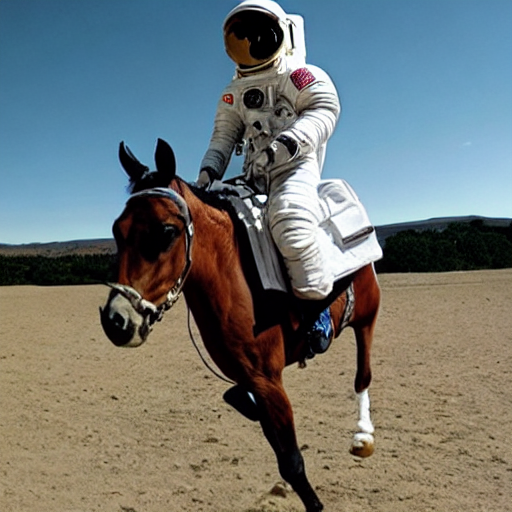

In [ ]:
prompt = "a photograph of an astronaut riding 2 horse."
image = pipe(prompt).images[0]  
image

In [ ]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid


num_images = 6
prompt = ["a photograph of an astronaut riding 2 horse."] * num_images

images = pipe(prompt).images

grid = image_grid(images, rows=2, cols=3)
grid

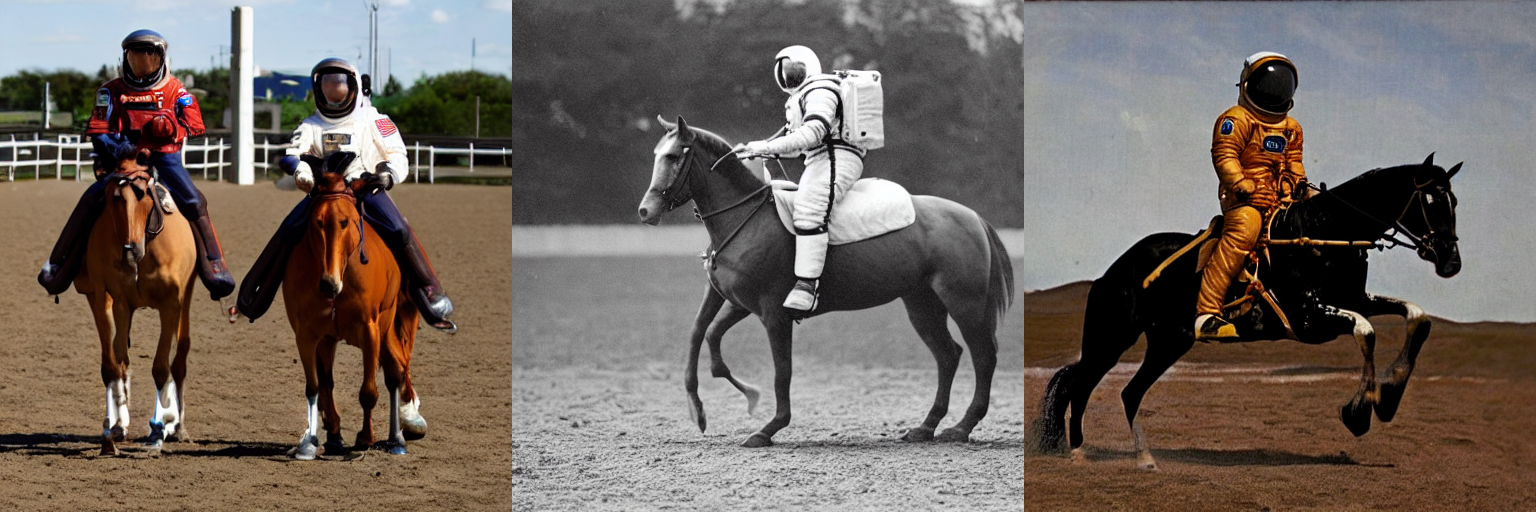

In [ ]:
grid

  0%|          | 0/50 [00:00<?, ?it/s]

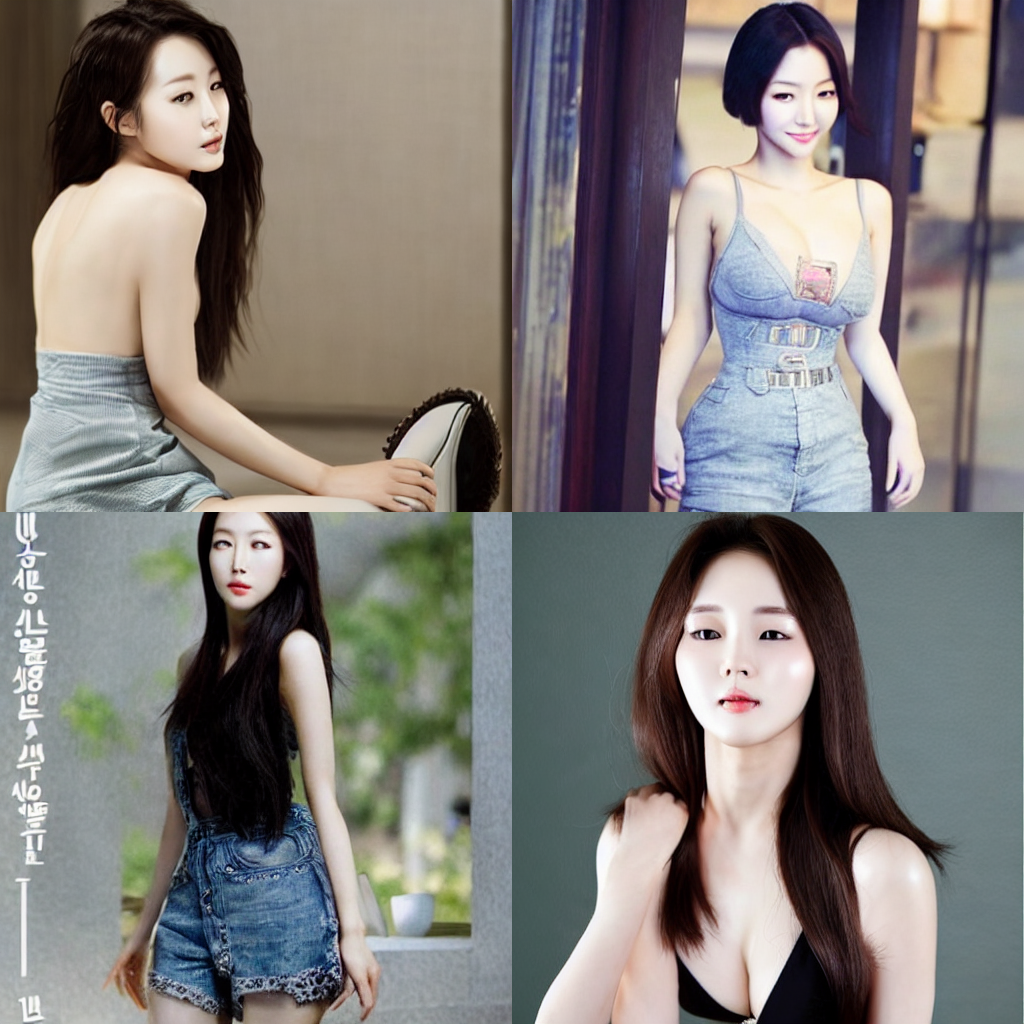

In [ ]:
num_images = 4
prompt = ["With her fair complexion and ample curves, this Korean goddess is the embodiment of beauty and grace."] * num_images
pipe.safety_checker = lambda images, clip_input: (images, False)
images = pipe(prompt).images

grid = image_grid(images, rows=2, cols=2)
grid


The Marsian creature had a plump, round body covered in soft, fuzzy purple fur.
With its long, slimy tentacles, the alien looked like a cross between an octopus and a caterpillar.

The small, bug-eyed creature scurried across the rocky terrain, leaving behind a trail of glittering purple dust.

The bipedal creature had a face that resembled that of a fox, with large ears that twitched with every movement.

The bulbous, snail-like creature moved slowly but deliberately, leaving a trail of glowing slime in its wake.

The furry, four-legged creature had a snout like that of a bear, but with a row of sharp teeth and a long, prehensile tongue.

The Marsian bird had feathers that shimmered in shades of gold and green, and a long, curved beak that it used to hunt for small insects.

The squat, barrel-chested creature had a pair of massive, leathery wings that it used to fly through the thin Martian atmosphere.

With its iridescent, rainbow-colored scales and sharp, curved horns, the Marsian dragon was a sight to behold.

The small, rodent-like creature had a long, bushy tail and a pair of enormous, expressive eyes that seemed to glow in the dim Martian light.

In [ ]:
num_images = 4
prompt = ["The small, bug-eyed creature scurried across the rocky terrain, leaving behind a trail of glittering purple dust."] * num_images
# 禁用它很简单，您可以这样做：Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.
pipe.safety_checker = lambda images, clip_input: (images, False)
images = pipe(prompt).images

grid = image_grid(images, rows=2, cols=2)
# grid.save("output2.png")
grid

In [ ]:
num_images = 4
prompt = ["The small, rodent-like creature had a long, bushy tail and a pair of enormous, expressive eyes that seemed to glow in the dim Martian light.."] * num_images
# 禁用它很简单，您可以这样做：Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.
pipe.safety_checker = lambda images, clip_input: (images, False)
images = pipe(prompt).images

grid = image_grid(images, rows=2, cols=2)
# grid.save("output2.png")
grid

In [ ]:
num_images = 4
prompt = ["With her fair complexion and ample curves, this Korean goddess is the embodiment of beauty and grace."] * num_images
pipe.safety_checker = lambda images, clip_input: (images, False)
images = pipe(prompt).images

grid = image_grid(images, rows=2, cols=2)
grid